# Survival Analysis

The objective of this notebook is present asurvival analysis to data get from XXX company, in order to research the most important features that have incidence over the decition of an employee to left the company.

In [1]:
# Importing modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pysurvival.datasets import Dataset
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Load data
raw_dataset = Dataset('employee_attrition').load()
print("The raw_dataset has the following shape: {}.".format(raw_dataset.shape))
raw_dataset.head(3)

The raw_dataset has the following shape: (523, 23).


,codigo,age,dwom,dmen,civstat,depto,left,time_spend_company_days,jorn,travel_time,...,level,department,GMU2010 I,travel_timeadj,nDelitos,tDelitos,salary+inc7,salary+inc12,salaryinc7,salaryinc12
0,7840,34,1,0,SOLTERO,87,1,39,1,4.940,...,5,GERENTE,0.000000,4.940,0,NaN,458.6341,480.0656,30.0041,51.4356
1,7879,26,0,1,SOLTERO,72,1,161,1,4.170,...,1,AYUDANTE,0.833333,4.170,31,5.605787,114.8538,120.2208,7.5138,12.8808
2,7505,30,0,1,SOLTERO,82,1,520,1,11.188,...,1,AYUDANTE,0.833333,11.254,0,0.000000,136.6604,143.0464,8.9404,15.3264


In [3]:
# Creating one-hot vectors from categorical data and eliminate NuLL and Nan  values
category_columns = ['civstat', 'department']
dataset = pd.get_dummies(raw_dataset, columns=category_columns, drop_first=True)
dataset.dropna(how='any',axis=0) 
dataset.notnull()
dataset.head()


,codigo,age,dwom,dmen,depto,left,time_spend_company_days,jorn,travel_time,distance,...,civstat_DIVORCIADO,civstat_SOLTERO,civstat_VIUDO,department_AYUDANTE,department_COCINERO,department_ENCARGADO,department_GERENTE,department_HIGIENISTA,department_JEFE,department_SUPERVISOR
0,7840,34,1,0,87,1,39,1,4.940,6.433333,...,0,1,0,0,0,0,1,0,0,0
1,7879,26,0,1,72,1,161,1,4.170,12.483333,...,0,1,0,1,0,0,0,0,0,0
2,7505,30,0,1,82,1,520,1,11.188,24.283333,...,0,1,0,1,0,0,0,0,0,0
3,7331,42,1,0,45,1,338,1,7.521,16.816667,...,0,0,0,1,0,0,0,0,0,0
4,7774,24,1,0,87,1,109,1,7.071,15.333333,...,0,0,0,1,0,0,0,0,0,0


In [25]:
dataset['ageq'] = pd.qcut(dataset['age'], q=4)

In [4]:
#Cleaning data to avoid null and nan values
N_null = sum(dataset.isnull().sum())
print("The dataset contains {} null values".format(N_null)) #0 null values
dataset.dropna()
# Removing duplicates if there exist
N_dupli = sum(dataset.duplicated(keep='first'))
dataset = dataset.drop_duplicates(keep='first').reset_index(drop=True)
print("The dataset contains {} duplicates".format(N_dupli))

# Number of samples in the dataset
N = dataset.shape[0]

The dataset contains 204 null values
The dataset contains 0 duplicates


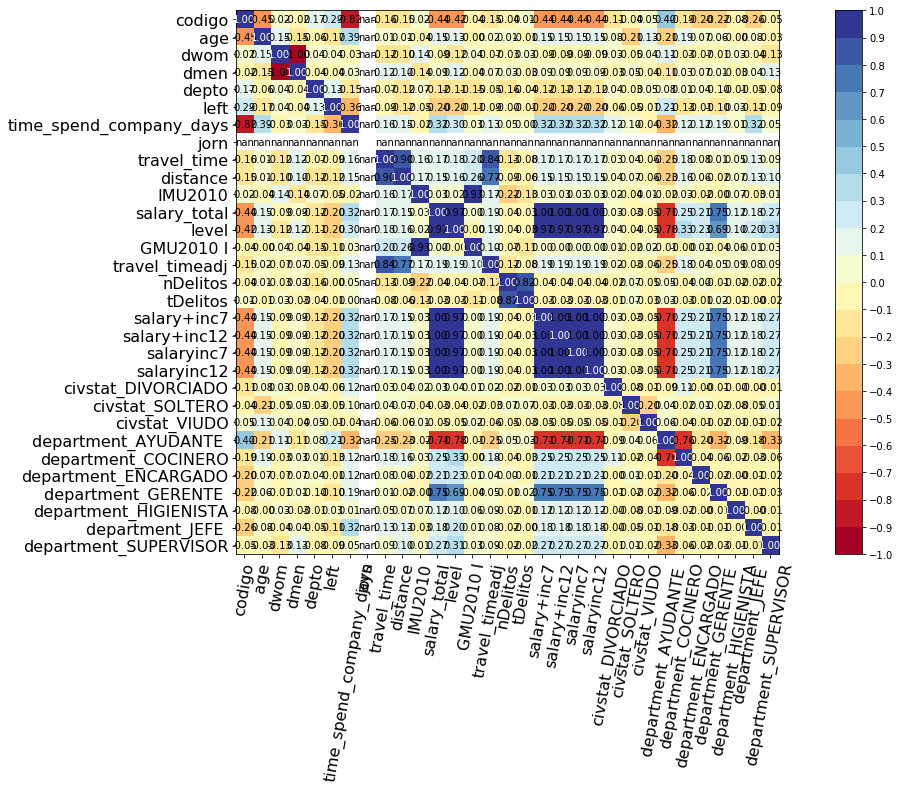

In [5]:
#Correlation matrix 
#Computing correlation matrix
from pysurvival.utils.display import correlation_matrix
correlation_matrix(dataset, figure_size=(20,10), text_fontsize=10)

In [6]:
dataset.columns

Index(['codigo', 'age', 'dwom', 'dmen', 'depto', 'left',
       'time_spend_company_days', 'jorn', 'travel_time', 'distance', 'IMU2010',
       'salary_total', 'level', 'GMU2010 I', 'travel_timeadj', 'nDelitos',
       'tDelitos', 'salary+inc7', 'salary+inc12', 'salaryinc7', 'salaryinc12',
       'civstat_DIVORCIADO', 'civstat_SOLTERO', 'civstat_VIUDO',
       'department_AYUDANTE ', 'department_COCINERO', 'department_ENCARGADO',
       'department_GERENTE ', 'department_HIGIENISTA', 'department_JEFE ',
       'department_SUPERVISOR'],
      dtype='object')

In [7]:
del dataset['codigo']
del dataset['dmen']
del dataset['department_COCINERO']
del dataset['department_AYUDANTE ']
del dataset['travel_time']
del dataset['tDelitos']
del dataset['salary_total']
del dataset['salary+inc7']
del dataset['salaryinc7']
del dataset['salaryinc12']

In [8]:
dataset.dropna(how='any',axis=0) 

,age,dwom,depto,left,time_spend_company_days,jorn,distance,IMU2010,level,GMU2010 I,...,nDelitos,salary+inc12,civstat_DIVORCIADO,civstat_SOLTERO,civstat_VIUDO,department_ENCARGADO,department_GERENTE,department_HIGIENISTA,department_JEFE,department_SUPERVISOR
1,26,0,72,1,161,1,12.483333,0.115598,1,0.833333,...,31,120.2208,0,1,0,0,0,0,0,0
2,30,0,82,1,520,1,24.283333,0.172690,1,0.833333,...,0,143.0464,0,1,0,0,0,0,0,0
3,42,1,45,1,338,1,16.816667,-0.574877,1,0.500000,...,59,120.2208,0,0,0,0,0,0,0,0
4,24,1,87,1,109,1,15.333333,1.433001,1,1.000000,...,0,120.2208,0,0,0,0,0,0,0,0
5,39,1,51,1,56,1,25.616667,0.104109,1,0.833333,...,41,120.2208,0,1,0,0,0,0,0,0
7,36,0,50,1,28,1,24.383333,-0.889743,2,0.333333,...,41,180.2864,0,1,0,0,0,0,0,0
8,21,0,88,1,12,1,19.833333,0.325499,1,0.833333,...,0,120.2208,0,1,0,0,0,0,0,0
9,22,0,50,1,10,1,32.183333,0.512970,2,0.833333,...,0,180.2864,0,1,0,0,0,0,0,0
10,56,0,81,1,987,1,26.066667,-0.741871,3,0.333333,...,0,290.5504,0,0,0,1,0,0,0,0
11,52,1,50,1,182,1,30.350000,-0.398168,2,0.500000,...,0,189.7056,0,0,0,0,0,0,0,0


In [11]:
N_null = sum(dataset.isnull().sum())
print("The dataset contains {} null values".format(N_null)) #0 null values

# Removing duplicates if there exist
N_dupli = sum(dataset.duplicated(keep='first'))
dataset = dataset.drop_duplicates(keep='first').reset_index(drop=True)
print("The dataset contains {} duplicates".format(N_dupli))

# Number of samples in the dataset
N = dataset.shape[0]

The dataset contains 102 null values
The dataset contains 0 duplicates


In [9]:
dataset.notnull() 

,age,dwom,depto,left,time_spend_company_days,jorn,distance,IMU2010,level,GMU2010 I,...,nDelitos,salary+inc12,civstat_DIVORCIADO,civstat_SOLTERO,civstat_VIUDO,department_ENCARGADO,department_GERENTE,department_HIGIENISTA,department_JEFE,department_SUPERVISOR
0,True,True,True,True,True,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [10]:
dataset = dataset.dropna(how='any',axis=0) 

In [11]:
dataset

,age,dwom,depto,left,time_spend_company_days,jorn,distance,IMU2010,level,GMU2010 I,...,nDelitos,salary+inc12,civstat_DIVORCIADO,civstat_SOLTERO,civstat_VIUDO,department_ENCARGADO,department_GERENTE,department_HIGIENISTA,department_JEFE,department_SUPERVISOR
1,26,0,72,1,161,1,12.483333,0.115598,1,0.833333,...,31,120.2208,0,1,0,0,0,0,0,0
2,30,0,82,1,520,1,24.283333,0.172690,1,0.833333,...,0,143.0464,0,1,0,0,0,0,0,0
3,42,1,45,1,338,1,16.816667,-0.574877,1,0.500000,...,59,120.2208,0,0,0,0,0,0,0,0
4,24,1,87,1,109,1,15.333333,1.433001,1,1.000000,...,0,120.2208,0,0,0,0,0,0,0,0
5,39,1,51,1,56,1,25.616667,0.104109,1,0.833333,...,41,120.2208,0,1,0,0,0,0,0,0
7,36,0,50,1,28,1,24.383333,-0.889743,2,0.333333,...,41,180.2864,0,1,0,0,0,0,0,0
8,21,0,88,1,12,1,19.833333,0.325499,1,0.833333,...,0,120.2208,0,1,0,0,0,0,0,0
9,22,0,50,1,10,1,32.183333,0.512970,2,0.833333,...,0,180.2864,0,1,0,0,0,0,0,0
10,56,0,81,1,987,1,26.066667,-0.741871,3,0.333333,...,0,290.5504,0,0,0,1,0,0,0,0
11,52,1,50,1,182,1,30.350000,-0.398168,2,0.500000,...,0,189.7056,0,0,0,0,0,0,0,0


In [12]:
dataset.notnull() 

,age,dwom,depto,left,time_spend_company_days,jorn,distance,IMU2010,level,GMU2010 I,...,nDelitos,salary+inc12,civstat_DIVORCIADO,civstat_SOLTERO,civstat_VIUDO,department_ENCARGADO,department_GERENTE,department_HIGIENISTA,department_JEFE,department_SUPERVISOR
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
10,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
11,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [13]:
N_null = sum(dataset.isnull().sum())
print("The dataset contains {} null values".format(N_null)) #0 null values

# Removing duplicates if there exist
N_dupli = sum(dataset.duplicated(keep='first'))
dataset = dataset.drop_duplicates(keep='first').reset_index(drop=True)
print("The dataset contains {} duplicates".format(N_dupli))

# Number of samples in the dataset
N = dataset.shape[0]

The dataset contains 0 null values
The dataset contains 0 duplicates


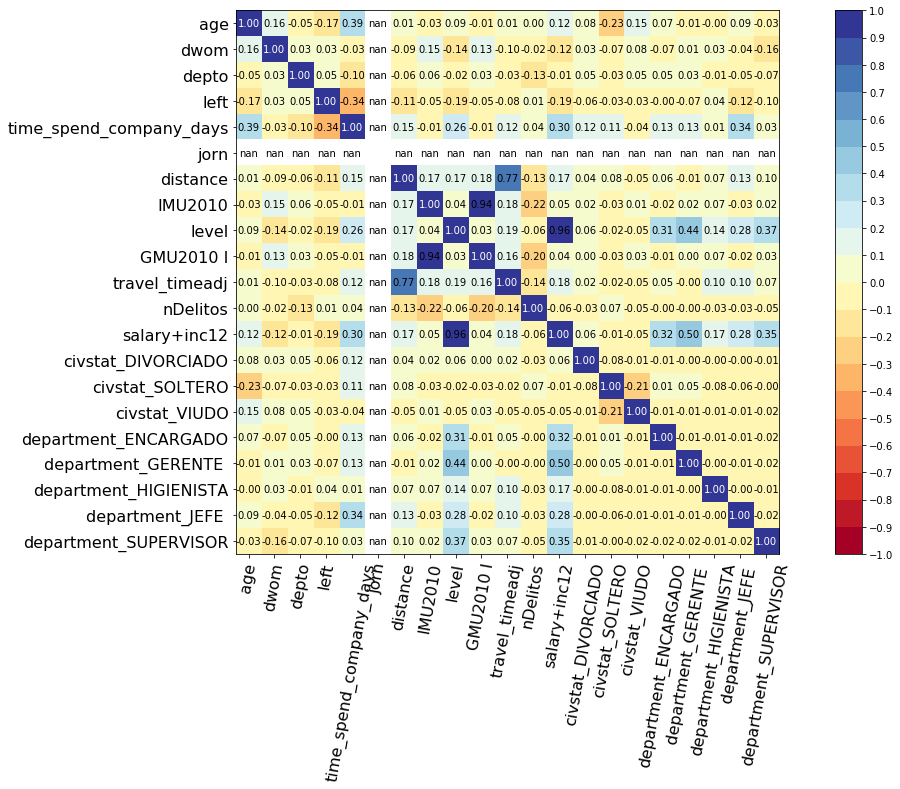

In [14]:
#Correlation matrix 
#Computing correlation matrix
from pysurvival.utils.display import correlation_matrix
correlation_matrix(dataset, figure_size=(20,10), text_fontsize=10)

# Exploratory Data Analysis

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 21 columns):
age                        450 non-null int64
dwom                       450 non-null int64
depto                      450 non-null int64
left                       450 non-null int64
time_spend_company_days    450 non-null int64
jorn                       450 non-null int64
distance                   450 non-null float64
IMU2010                    450 non-null float64
level                      450 non-null int64
GMU2010 I                  450 non-null float64
travel_timeadj             450 non-null float64
nDelitos                   450 non-null int64
salary+inc12               450 non-null float64
civstat_DIVORCIADO         450 non-null uint8
civstat_SOLTERO            450 non-null uint8
civstat_VIUDO              450 non-null uint8
department_ENCARGADO       450 non-null uint8
department_GERENTE         450 non-null uint8
department_HIGIENISTA      450 non-null uint8
department_

In [16]:
dataset.columns

Index(['age', 'dwom', 'depto', 'left', 'time_spend_company_days', 'jorn',
       'distance', 'IMU2010', 'level', 'GMU2010 I', 'travel_timeadj',
       'nDelitos', 'salary+inc12', 'civstat_DIVORCIADO', 'civstat_SOLTERO',
       'civstat_VIUDO', 'department_ENCARGADO', 'department_GERENTE ',
       'department_HIGIENISTA', 'department_JEFE ', 'department_SUPERVISOR'],
      dtype='object')

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style="whitegrid", color_codes=True)

In [18]:

total_of_workers = dataset.shape[0]
total_of_active_workers = (np.sum(dataset['left'] == 0)/total_of_workers)*100
total_of_workers_left = (np.sum(dataset['left'] == 1)/total_of_workers)*100
print("active_workers:", round(total_of_active_workers,2),"%")
print("workers_left:", round(total_of_workers_left,2),"%")

active_workers: 38.67 %
workers_left: 61.33 %


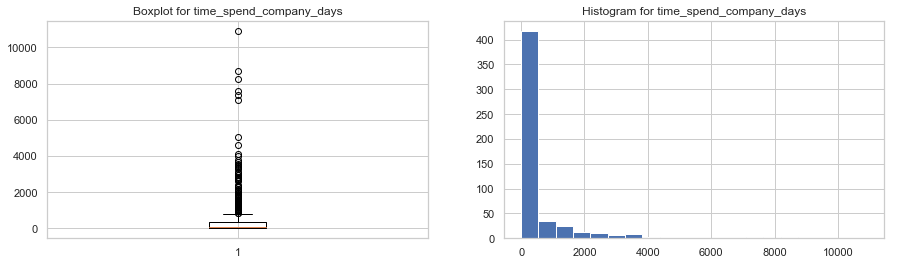

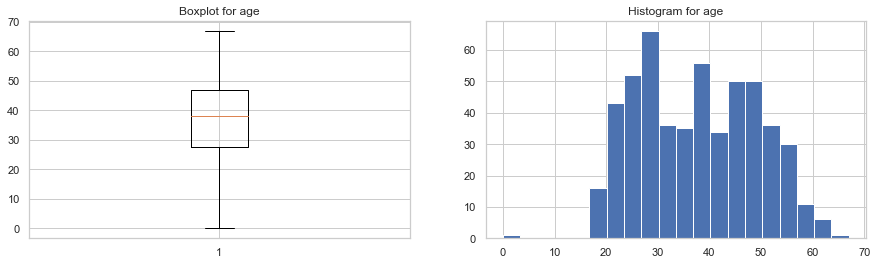

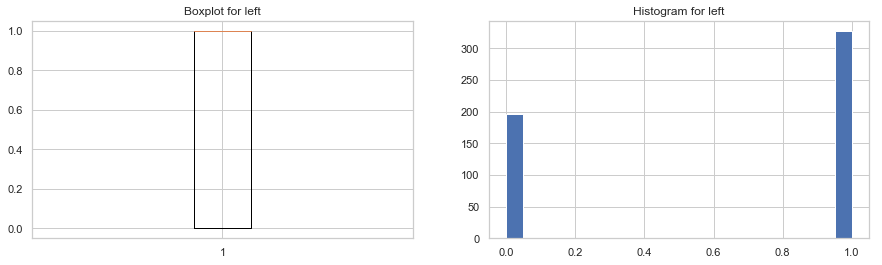

C:\Users\JESICA\Anaconda3.5\lib\site-packages\numpy\lib\function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\JESICA\Anaconda3.5\lib\site-packages\matplotlib\cbook\__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\Users\JESICA\Anaconda3.5\lib\site-packages\matplotlib\cbook\__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
C:\Users\JESICA\Anaconda3.5\lib\site-packages\matplotlib\cbook\__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
C:\Users\JESICA\Anaconda3.5\lib\site-packages\matplotlib\cbook\__init__.py:1262: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)
C:\Users\JESICA\Anaconda3.5\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  kee

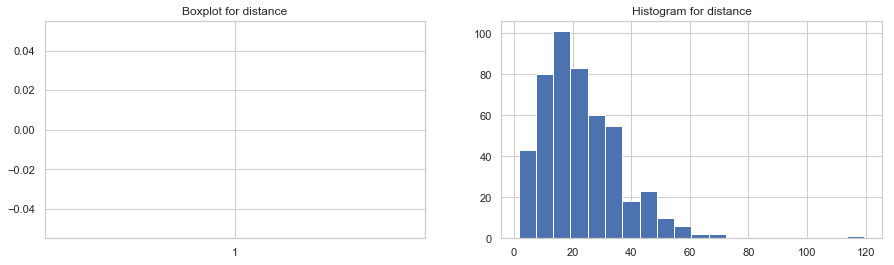

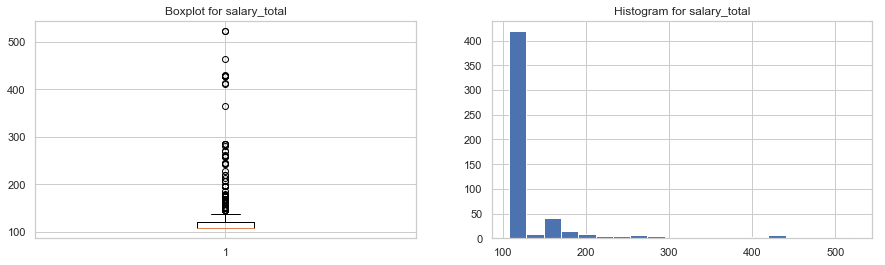

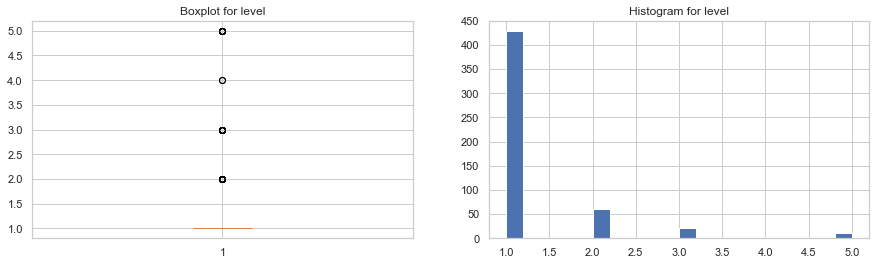

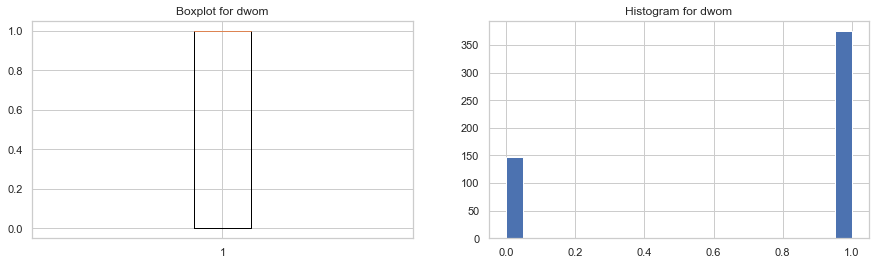

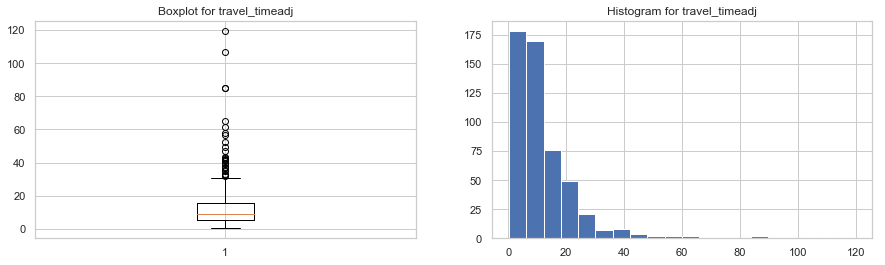

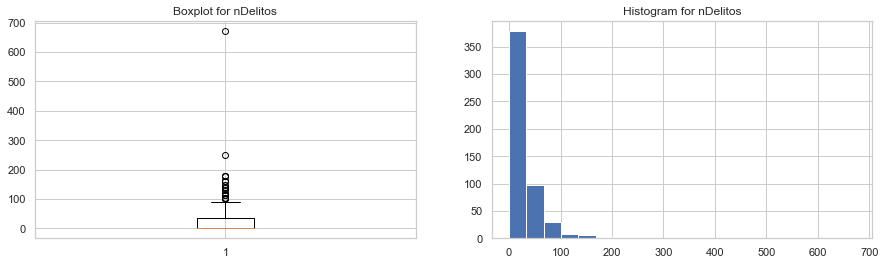

In [19]:
for feature in ['time_spend_company_days','age','left','distance','salary_total','level','dwom','travel_timeadj','nDelitos']:

    # Creating an empty chart
    fig, ((ax1, ax2)) = plt.subplots(1, 2,  figsize=(15, 4))

    # Extracting the feature values
    x = raw_dataset[feature].values

    # Boxplot
    ax1.boxplot(x)
    ax1.set_title( 'Boxplot for {}'.format(feature) )

    # Histogram
    ax2.hist(x, bins=20)
    ax2.set_title( 'Histogram for {}'.format(feature) )

    # Display
    plt.show()

C:\Users\JESICA\Anaconda3.5\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


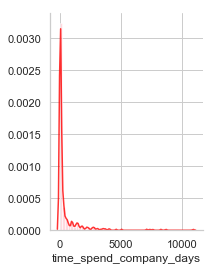

In [20]:
#plt.figure(figsize=(6,3.5))
#plt.subplot(1, 2, 1)
#sns.distplot(dataset['ageq'],
 #            kde_kws={"color":"blue","lw":1.5,"alpha":0.8},
  #           hist_kws={"color":"green","alpha":0.3})
#sns.despine()
plt.subplot(1, 2, 2)
sns.distplot(dataset['time_spend_company_days'],
            kde_kws={"color":"red","lw":1.5,"alpha":0.8},
            hist_kws={"color":"pink","alpha":0.6})
sns.despine();

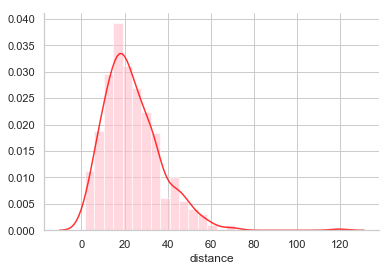

In [26]:
sns.distplot(dataset['distance'],
            kde_kws={"color":"red","lw":1.5,"alpha":0.8},
            hist_kws={"color":"pink","alpha":0.6})
sns.despine();

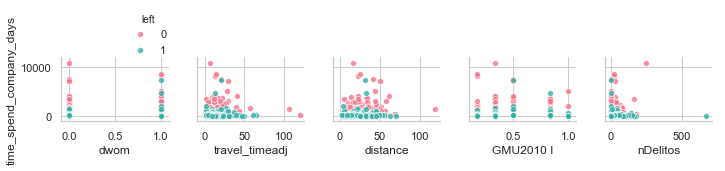

In [21]:
g = sns.pairplot(dataset, x_vars = ['dwom', 'travel_timeadj', 'distance','GMU2010 I','nDelitos'], 
               y_vars = ['time_spend_company_days'], 
               hue = 'left', 
               kind= 'scatter',
               palette = 'husl',
               height = 2,
               plot_kws={"s": 35, "alpha": 0.8})
g.fig.get_children()[-1].set_bbox_to_anchor((0.05, 0.9, 0.18, 0.1));

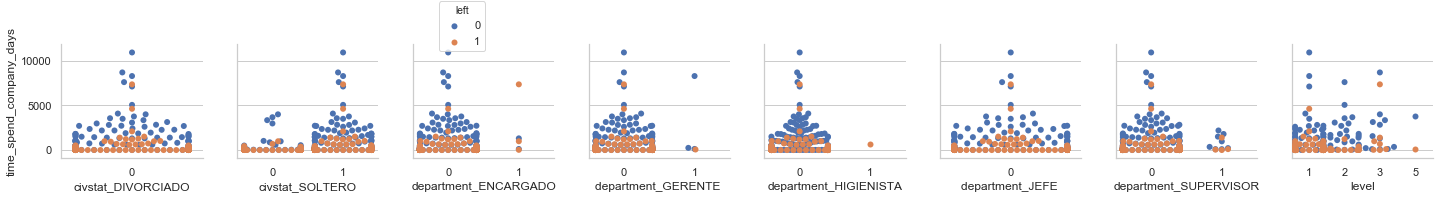

In [22]:
graph = sns.PairGrid(dataset,
                 x_vars=['civstat_DIVORCIADO','civstat_SOLTERO','department_ENCARGADO','department_GERENTE ','department_HIGIENISTA','department_JEFE ','department_SUPERVISOR','level'],
                 y_vars=['time_spend_company_days'],
                 hue = 'left')
graph.map(sns.swarmplot, s = 6)
graph.add_legend(frameon=True, bbox_to_anchor=(0.33, 0.96));

# SURVIVAL ANALISYS PRE PROCESSING

In [25]:
# Creating the time and event columns
time_column = 'time_spend_company_days'
event_column = 'left'

# Creating the features
features = np.setdiff1d(dataset.columns, [time_column, event_column] ).tolist()


# Survival Function of entire population

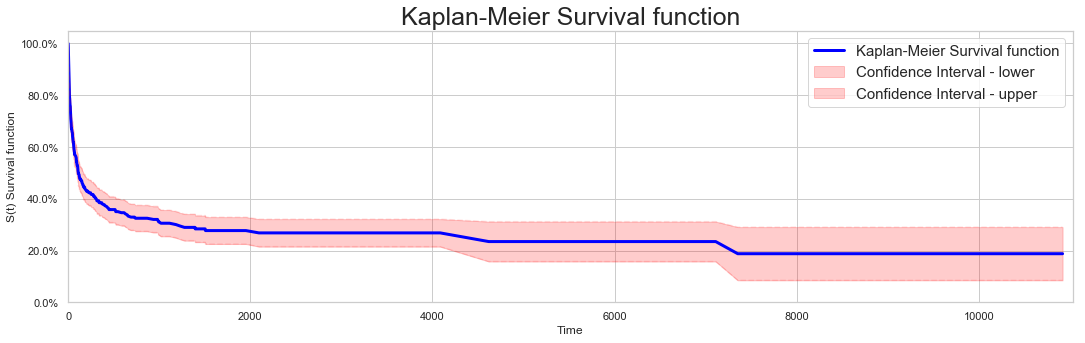

In [26]:
import numpy as np
from matplotlib import pyplot as plt
from pysurvival.models.non_parametric import KaplanMeierModel
from pysurvival.utils.display import display_non_parametric
%matplotlib inline 

# Generating random times and event indicators 
T = dataset['time_spend_company_days']
E = dataset['left']

# Initializing the KaplanMeierModel
km_model = KaplanMeierModel()

# Fitting the model 
km_model.fit(T, E, alpha=0.95)

# Displaying the survival function and confidence intervals
display_non_parametric(km_model)

# Survival Function according level of employees 

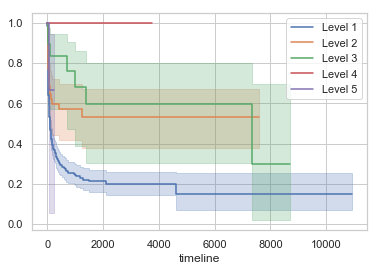

In [27]:
#lifelines
#Level in jerarqy and survival curve
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
from lifelines import KaplanMeierFitter
kmf1 = KaplanMeierFitter() ## instantiate the class to create an object

## Five Cohorts are compared according level of jerarqy
groups = dataset['level']   
i1 = (groups == 1)      ## group i1 , having the pandas series  for the 1st cohort
i2 = (groups == 2)     ## group i2 , having the pandas series  for the 2nd cohort
i3 = (groups == 3)  
i4 = (groups == 4)
i5 = (groups == 5)  
## fit the model for 1st cohort
kmf1.fit(T[i1], E[i1], label='Level 1')
a1 = kmf1.plot()
mst1=kmf1.median_survival_time_
## fit the model for 2nd cohort
kmf1.fit(T[i2], E[i2], label='Level 2')
kmf1.plot(ax=a1)
mst2=kmf1.median_survival_time_
## fit the model for 2nd cohort
kmf1.fit(T[i3], E[i3], label='Level 3')
kmf1.plot(ax=a1)
mst3=kmf1.median_survival_time_
## fit the model for nd cohort
kmf1.fit(T[i4], E[i4], label='Level 4')
kmf1.plot(ax=a1)
mst4=kmf1.median_survival_time_
## fit the model for 2nd cohort
kmf1.fit(T[i5], E[i5], label='Level 5')
kmf1.plot(ax=a1)
mst5=kmf1.median_survival_time_

In [28]:
print("Median survival time by level")
print(mst1)
print(mst2)
print(mst3)
print(mst4)
print(mst5)

Median survival time by level
95.0
inf
7353.0
inf
inf


In [29]:
# Downsampling the dataset to speed up computations
indexes_choices = np.random.choice(N, int(N*0.3), replace=False).tolist()

# Building training and testing sets #
from sklearn.model_selection import train_test_split
index_train, index_test = train_test_split( indexes_choices, test_size = 0.4)
data_train = dataset.loc[index_train].reset_index( drop = True )
data_test  = dataset.loc[index_test].reset_index( drop = True )

# Creating the X, T and E inputs
X_train, X_test = data_train[features], data_test[features]
T_train, T_test = data_train[time_column], data_test[time_column]
E_train, E_test = data_train[event_column], data_test[event_column]

In [30]:
from pysurvival.models.survival_forest import ConditionalSurvivalForestModel

# Fitting the model
csf = ConditionalSurvivalForestModel(num_trees=200)
csf.fit(X_train, T_train, E_train, max_features='sqrt',
        alpha=0.05, minprop=0.1, max_depth=5, min_node_size=30)

ConditionalSurvivalForestModel

In [31]:
from pysurvival.utils.metrics import concordance_index
c_index = concordance_index(csf, X_test, T_test, E_test)
print('C-index: {:.2f}'.format(c_index)) 

C-index: 0.71


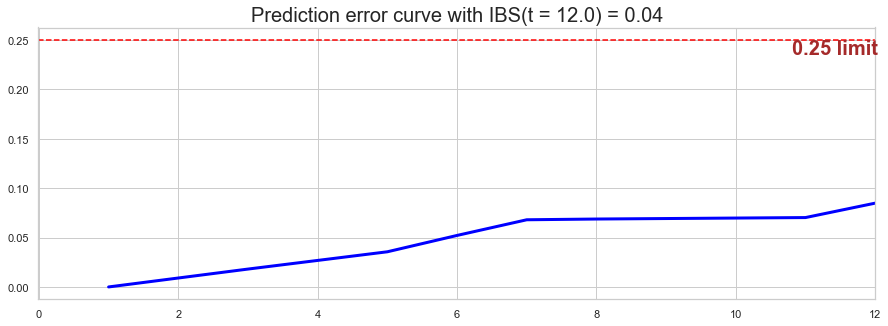

IBS: 0.04


In [32]:
from pysurvival.utils.display import integrated_brier_score
ibs = integrated_brier_score(csf, X_test, T_test, E_test, t_max=12,
    figure_size=(15,5))
print('IBS: {:.2f}'.format(ibs))

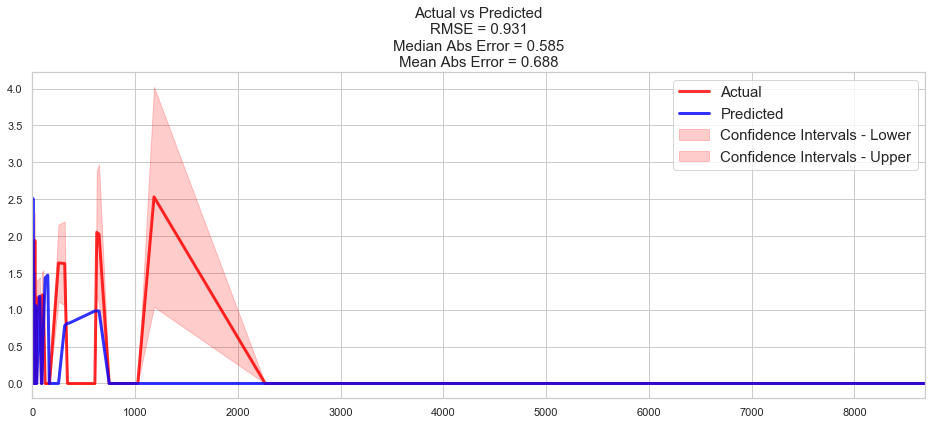

In [95]:
from pysurvival.utils.display import compare_to_actual
results = compare_to_actual(csf, X_test, T_test, E_test,
                            is_at_risk = False,  figure_size=(16, 6),
                            metrics = ['rmse', 'mean', 'median'])

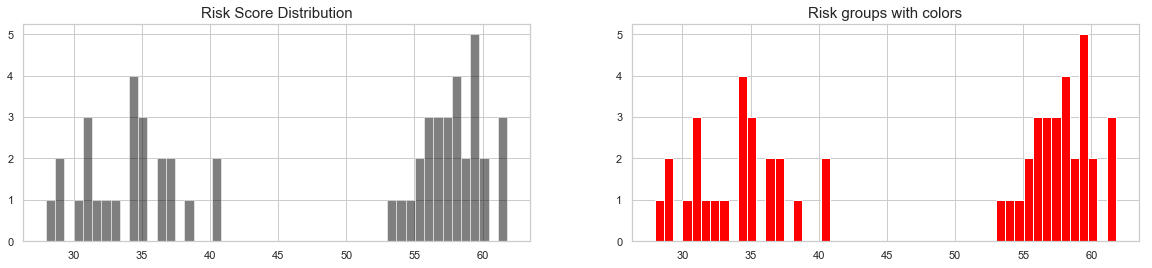

In [38]:
from pysurvival.utils.display import create_risk_groups

risk_groups = create_risk_groups(model=csf, X=X_test,
    use_log = False, num_bins=50, figure_size=(20, 4),
    low= {'lower_bound':0, 'upper_bound':200, 'color':'red'},
    high= {'lower_bound':200, 'upper_bound':500, 'color':'blue'}
    )

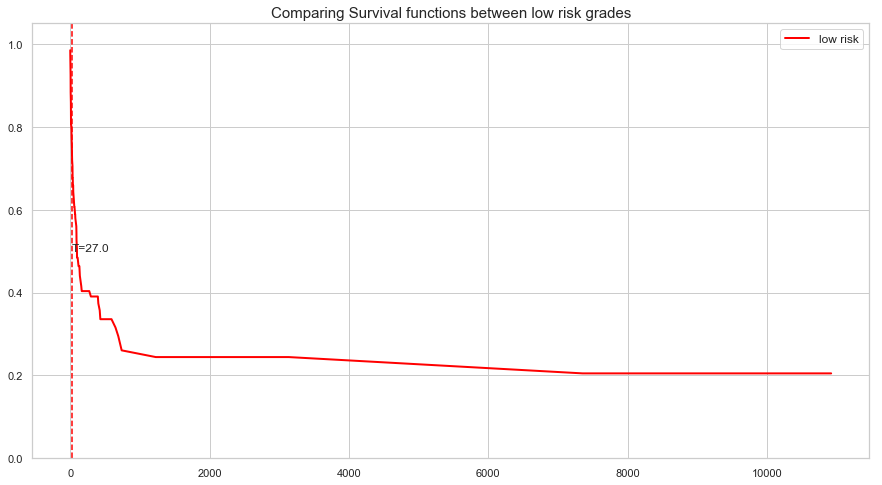

In [39]:
# Initializing the figure
fig, ax = plt.subplots(figsize=(15, 8))

# Selecting a random individual that experienced failure from each group
groups = []
for i, (label, (color, indexes)) in enumerate(risk_groups.items()) :

    # Selecting the individuals that belong to this group
    if len(indexes) == 0 :
        continue
    X = X_test.values[indexes, :]
    T = T_test.values[indexes]
    E = E_test.values[indexes]

    # Randomly extracting an individual that experienced an event
    choices = np.argwhere((E==1.)).flatten()
    if len(choices) == 0 :
        continue
    k = np.random.choice( choices, 1)[0]

    # Saving the time of event
    t = T[k]

    # Computing the Survival function for all times t
    survival = csf.predict_survival(X[k, :]).flatten()

    # Displaying the functions
    label_ = '{} risk'.format(label)
    plt.plot(csf.times, survival, color = color, label=label_, lw=2)
    groups.append(label)

    # Actual time
    plt.axvline(x=t, color=color, ls ='--')
    ax.annotate('T={:.1f}'.format(t), xy=(t, 0.5*(1.+0.2*i)),
        xytext=(t, 0.5*(1.+0.2*i)), fontsize=12)

# Show everything
groups_str = ', '.join(groups)
title = "Comparing Survival functions between {} risk grades".format(groups_str)
plt.legend(fontsize=12)
plt.title(title, fontsize=15)
plt.ylim(0, 1.05)
plt.show()

In [33]:
# Computing variables importance
csf.variable_importance_table.head(10)

,feature,importance,pct_importance
0,salary+inc12,6.671094,0.481251
1,level,4.185756,0.301959
2,travel_timeadj,1.434897,0.103513
3,civstat_SOLTERO,1.107328,0.079882
4,age,0.462911,0.033394
5,department_SUPERVISOR,0.000000,0.000000
6,jorn,0.000000,0.000000
7,dwom,0.000000,0.000000
8,depto,0.000000,0.000000
9,GMU2010 I,0.000000,0.000000


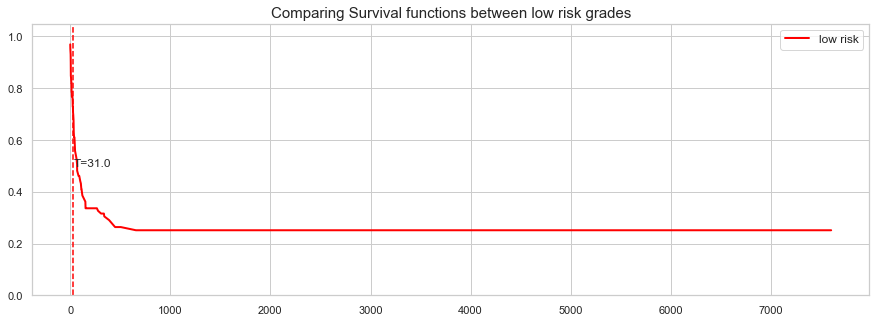

In [100]:
fig, ax = plt.subplots(figsize=(15, 5))

# Selecting a random individual that experienced an event from each group
groups = []
for i, (label, (color, indexes)) in enumerate(risk_groups.items()) :

    # Selecting the individuals that belong to this group
    if len(indexes) == 0 :
        continue
    X = X_test.values[indexes, :]
    T = T_test.values[indexes]
    E = E_test.values[indexes]

    # Randomly extracting an individual that experienced an event
    choices = np.argwhere((E==1.)).flatten()
    if len(choices) == 0 :
        continue
    k = np.random.choice( choices, 1)[0]

    # Saving the time of event
    t = T[k]

    # Computing the Survival function for all times t
    survival = csf.predict_survival(X[k, :]).flatten()

    # Displaying the functions
    label_ = '{} risk'.format(label)
    plt.plot(csf.times, survival, color = color, label=label_, lw=2)
    groups.append(label)

    # Actual time
    plt.axvline(x=t, color=color, ls ='--')
    ax.annotate('T={:.1f}'.format(t), xy=(t, 0.5*(1.+0.2*i)),
        xytext=(t, 0.5*(1.+0.2*i)), fontsize=12)

# Show everything
groups_str = ', '.join(groups)
title = "Comparing Survival functions between {} risk grades".format(groups_str)
plt.legend(fontsize=12)
plt.title(title, fontsize=15)
plt.ylim(0, 1.05)
plt.show()

In [102]:
from pysurvival.models.multi_task import NeuralMultiTaskModel

# Initializing the Neural MTLR with a time axis split into 100 intervals
structure = [
                {'activation': 'ReLU', 'num_units': 60},
                {'activation': 'Swish', 'num_units': 60},
            ]
neural_mtlr = NeuralMultiTaskModel(bins=100, structure=structure)

# Fitting the model
neural_mtlr.fit(X_train, T_train, E_train,
                init_method = 'orthogonal', optimizer ='rprop', lr = 1e-20,
                l2_reg = 1e-1,  l2_smooth = 1e-1,
                batch_normalization = True,  bn_and_dropout = True,
                dropout=0.5,  num_epochs = 500)

% Completion: 100%|***********************************************|Loss: 116.70


NeuralMultiTaskModel( Layer(1): activation = ReLU, units = 60 ; 
                      Layer(2): activation = Swish, units = 60 )

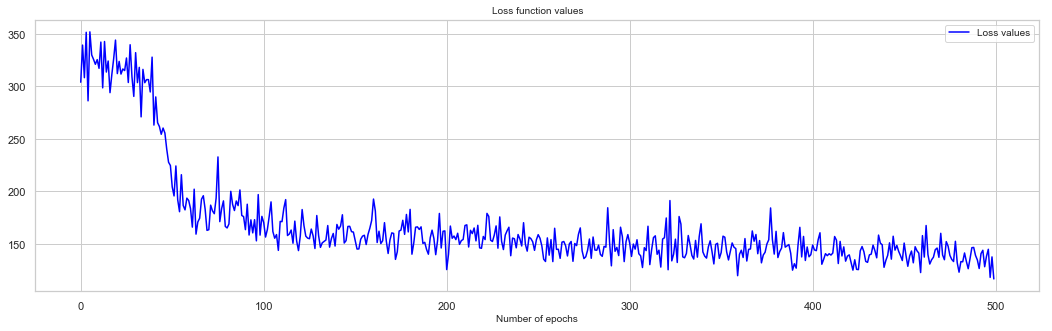

In [103]:
from pysurvival.utils.display import display_loss_values
display_loss_values(neural_mtlr)

In [104]:
from pysurvival.utils.metrics import concordance_index
c_index = concordance_index(neural_mtlr, X_test, T_test, E_test)
print('C-index: {:.2f}'.format(c_index)) #0.76

C-index: 0.51


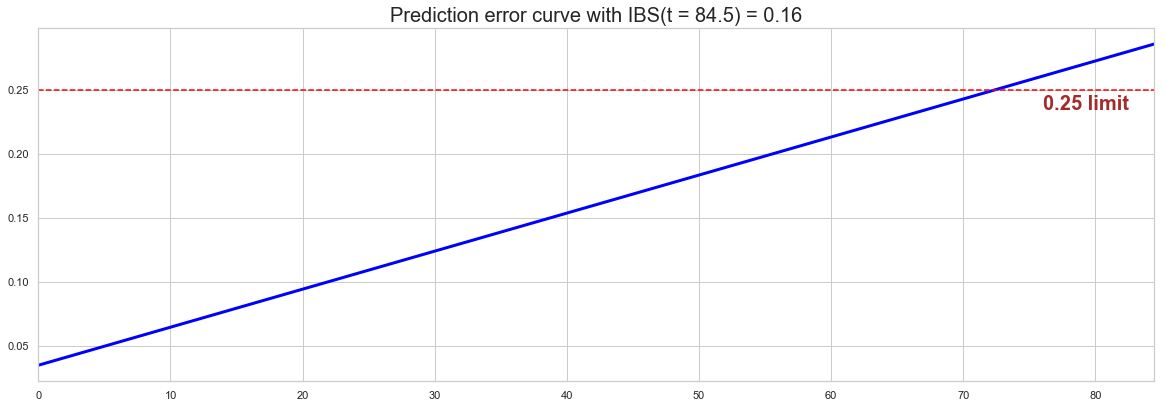

0.16037825282931417

In [105]:
from pysurvival.utils.display import integrated_brier_score
integrated_brier_score(neural_mtlr, X_test, T_test, E_test, t_max=100,
                       figure_size=(20, 6.5) ) #0.08

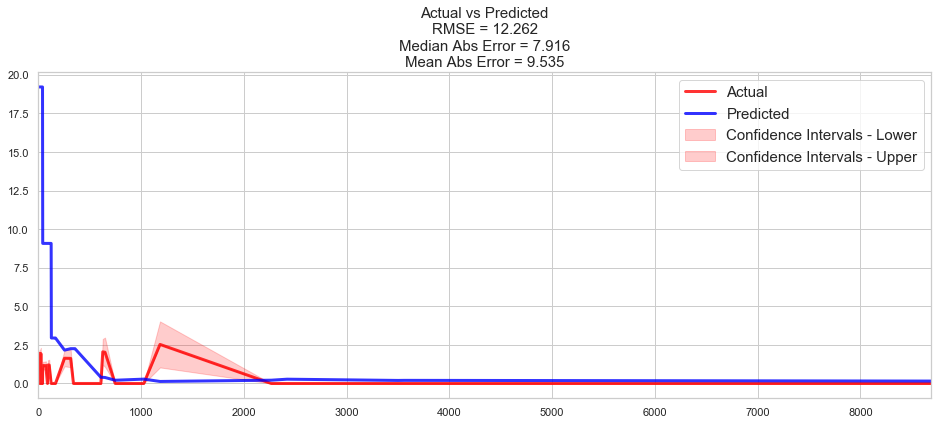

In [106]:
from pysurvival.utils.display import compare_to_actual
results = compare_to_actual(neural_mtlr, X_test, T_test, E_test,
                            is_at_risk = False,  figure_size=(16, 6),
                            metrics = ['rmse', 'mean', 'median'])

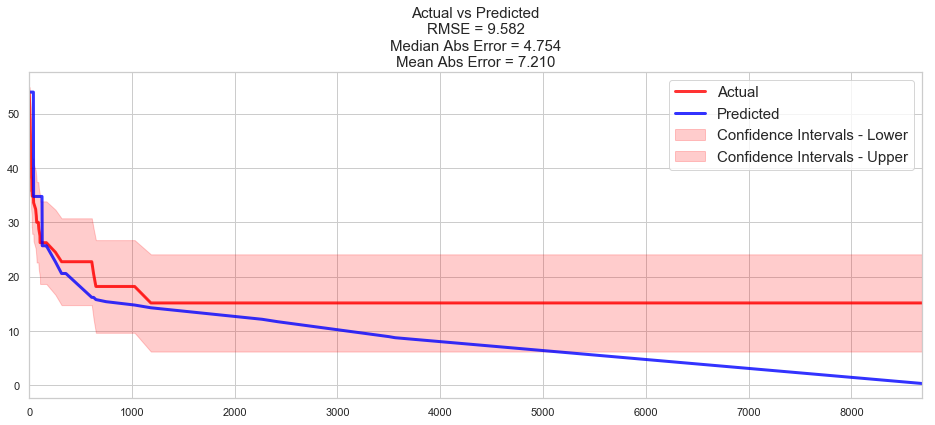

In [107]:
results = compare_to_actual(neural_mtlr, X_test, T_test, E_test,
                            is_at_risk = True,  figure_size=(16, 6),
                            metrics = ['rmse', 'mean', 'median'])

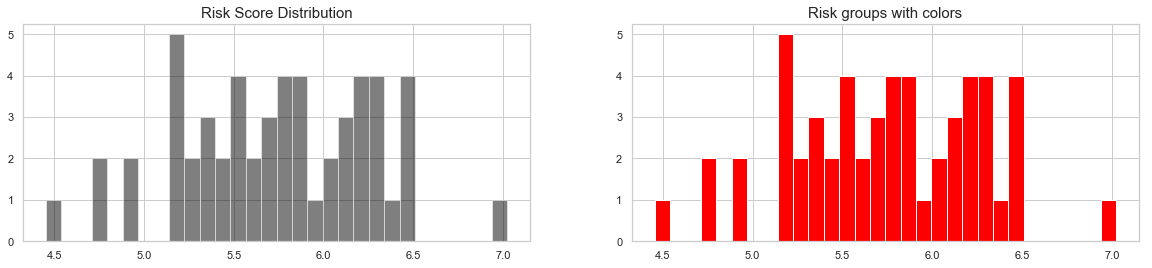

In [108]:

risk_groups = create_risk_groups(model=neural_mtlr, X=X_test,
    use_log = True, num_bins=30, figure_size=(20, 4),
    low= {'lower_bound':0, 'upper_bound':200, 'color':'red'},
    medium= {'lower_bound':201, 'upper_bound':300, 'color':'green'},
    high= {'lower_bound':301, 'upper_bound':500, 'color':'blue'}
    )

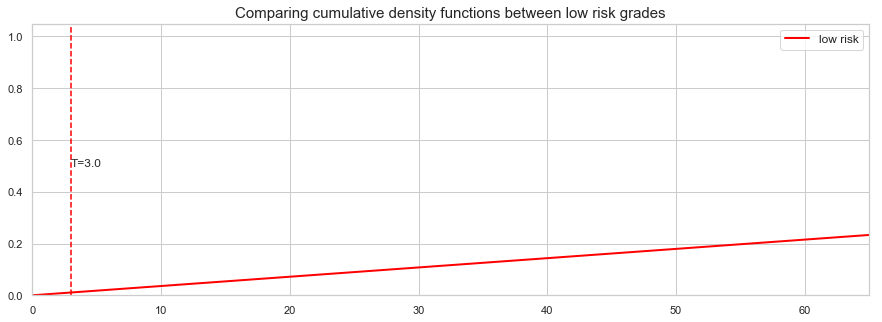

In [109]:
# Initializing the figure
fig, ax = plt.subplots(figsize=(15, 5))

# Selecting a random individual that experienced an event from each group
groups = []
for i, (label, (color, indexes)) in enumerate(risk_groups.items()) :

    # Selecting the individuals that belong to this group
    if len(indexes) == 0 :
        continue
    X = X_test.values[indexes, :]
    T = T_test.values[indexes]
    E = E_test.values[indexes]

    # Randomly extracting an individual that experienced an event
    choices = np.argwhere((E==1.)).flatten()
    if len(choices) == 0 :
        continue
    k = np.random.choice( choices, 1)[0]

    # Saving the time of event
    t = T[k]

    # Computing the CDF for all times t
    cdf = 1. - neural_mtlr.predict_survival(X[k, :]).flatten()

    # Displaying the functions
    label_ = '{} risk'.format(label)
    plt.plot(neural_mtlr.times, cdf, color = color, label=label_, lw=2)
    groups.append(label)

    # Actual time
    plt.axvline(x=t, color=color, ls ='--')
    ax.annotate('T={:.1f}'.format(t), xy=(t, 0.5*(1.+0.2*i)),
        xytext=(t, 0.5*(1.+0.2*i)), fontsize=12)

# Show everything
groups_str = ', '.join(groups)
title = "Comparing cumulative density functions between {} risk grades"
title = title.format(groups_str)
plt.legend(fontsize=12)
plt.title(title, fontsize=15)
plt.xlim(0, 65)
plt.ylim(0, 1.05)
plt.show()

In [ ]:
#Linear multitask

In [110]:
from pysurvival.models.multi_task import LinearMultiTaskModel

# Initializing the MTLR with a time axis split into 300 intervals
linear_mtlr = LinearMultiTaskModel(bins=300)

# Fitting the model
linear_mtlr.fit(X_train, T_train, E_train, num_epochs = 1000,
                init_method = 'orthogonal', optimizer ='rmsprop',
                lr = 1e-3, l2_reg = 3,  l2_smooth = 3, )

% Completion: 100%|***********************************************|Loss:  98.45


LinearMultiTaskModel

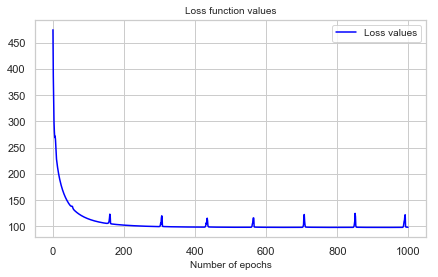

In [111]:
from pysurvival.utils.display import display_loss_values
display_loss_values(linear_mtlr, figure_size=(7, 4))

In [112]:
from pysurvival.utils.metrics import concordance_index
c_index = concordance_index(linear_mtlr, X_test, T_test, E_test)
print('C-index: {:.2f}'.format(c_index)) #0.92

C-index: 0.55


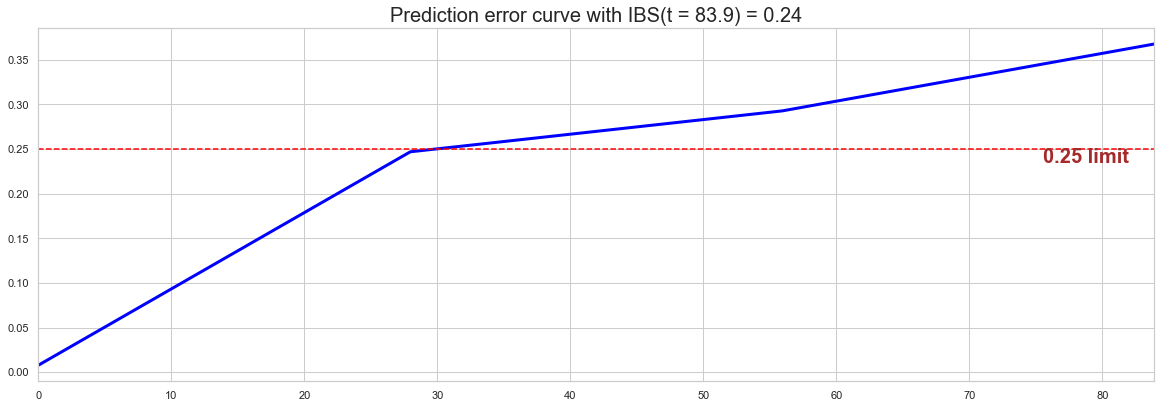

0.242447666089954

In [113]:
from pysurvival.utils.display import integrated_brier_score
integrated_brier_score(linear_mtlr, X_test, T_test, E_test, t_max=100,
                       figure_size=(20, 6.5) )

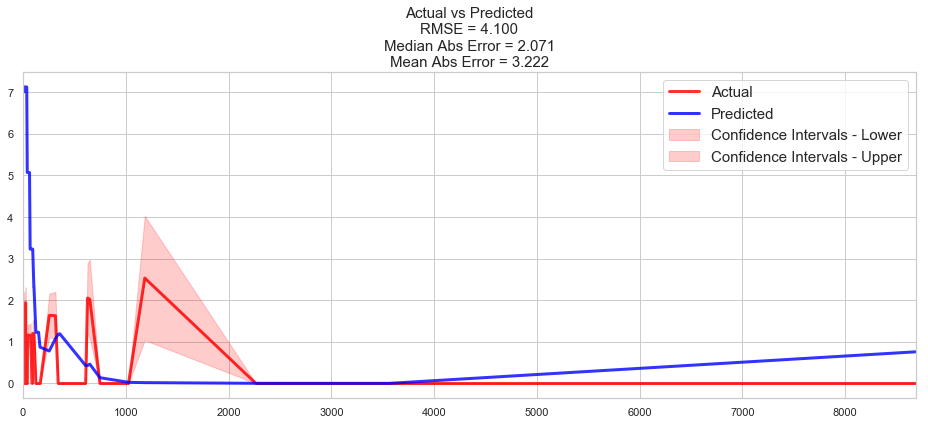

In [114]:
from pysurvival.utils.display import compare_to_actual
results = compare_to_actual(linear_mtlr, X_test, T_test, E_test,
                            is_at_risk = False,  figure_size=(16, 6),
                            metrics = ['rmse', 'mean', 'median'])

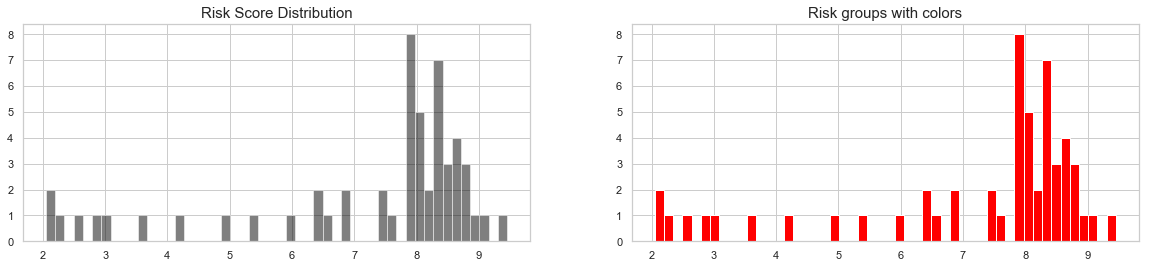

In [115]:
from pysurvival.utils.display import create_risk_groups

risk_groups = create_risk_groups(model=linear_mtlr, X=X_test,
    use_log = True, num_bins=50, figure_size=(20, 4),
    low= {'lower_bound':0, 'upper_bound':50, 'color':'red'},
    medium= {'lower_bound': 51, 'upper_bound':100, 'color':'green'},
    high= {'lower_bound':101, 'upper_bound':500, 'color':'blue'}
    )

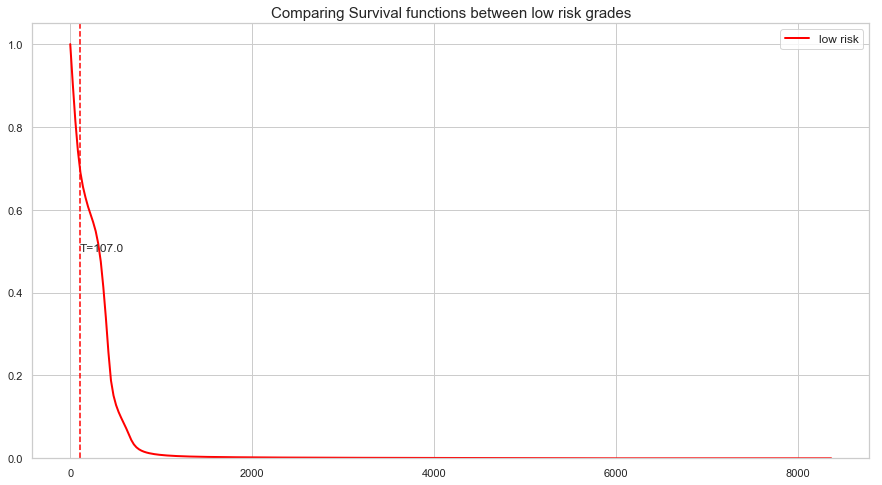

In [116]:
# Initializing the figure
fig, ax = plt.subplots(figsize=(15, 8))

# Selecting a random individual that experienced failure from each group
groups = []
for i, (label, (color, indexes)) in enumerate(risk_groups.items()) :

    # Selecting the individuals that belong to this group
    if len(indexes) == 0 :
        continue
    X = X_test.values[indexes, :]
    T = T_test.values[indexes]
    E = E_test.values[indexes]

    # Randomly extracting a machine that experienced failure from each group
    choices = np.argwhere((E==1.)).flatten()
    if len(choices) == 0 :
        continue
    k = np.random.choice( choices, 1)[0]

    # Saving the time of event
    t = T[k]

    # Computing the Survival function for all times t
    survival = linear_mtlr.predict_survival(X[k, :]).flatten()

    # Displaying the functions
    label_ = '{} risk'.format(label)
    plt.plot(linear_mtlr.times, survival, color = color, label=label_, lw=2)
    groups.append(label)

    # Actual time
    plt.axvline(x=t, color=color, ls ='--')
    ax.annotate('T={:.1f}'.format(t), xy=(t, 0.5*(1.+0.2*i)),
        xytext=(t, 0.5*(1.+0.2*i)), fontsize=12)

# Show everything
groups_str = ', '.join(groups)
title = "Comparing Survival functions between {} risk grades".format(groups_str)
plt.legend(fontsize=12)
plt.title(title, fontsize=15)
plt.ylim(0, 1.05)
plt.show()

In [215]:
from pysurvival.utils import save_model
save_model(csf, 'employee2_csf.zip')

Saving the model to disk as /employee2_csf.zip
